In [1]:
import pickle 

%matplotlib inline 

import matplotlib.pyplot as plt

In [4]:
fin = open('../../../results/Data_09042020/shawllo_fnn/shallow_fnn_act_relu_stride_10_window_100_inpQuants_voltage_d,voltage_q,current_d,current_q_outQuants_speed,torque_lr_0.01_batchSize_10000_epochs_1000_loss_mse.pkl', 'rb')
model_data = pickle.load(fin)
fin.close()

fin = open('../../../datasets/Data_09042020/benchmark/0to50speed_0torque.pkl', 'rb')
input_data = pickle.load(fin)
fin.close()


In [5]:
model_speed, model_torque = model_data

In [6]:
ref_speed, ref_torque = input_data['reference_speed_interp'], input_data['reference_torque_interp']
sim_speed, sim_torque = input_data['speed'], input_data['torque']
time = input_data['time']

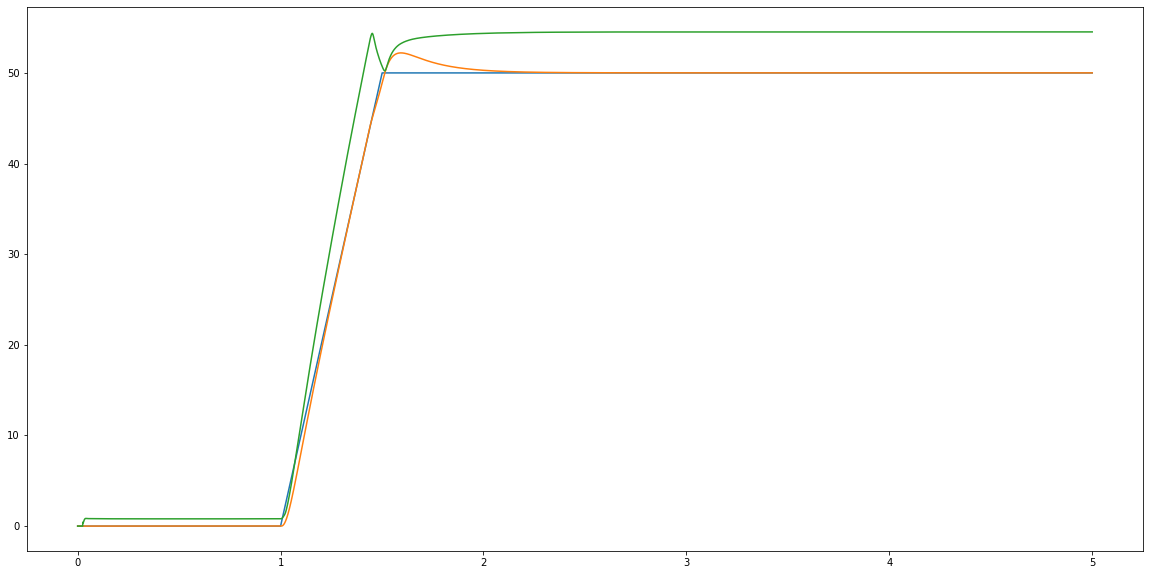

In [7]:
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(time, ref_speed)
plt.plot(time, sim_speed)
plt.plot(time, model_speed)

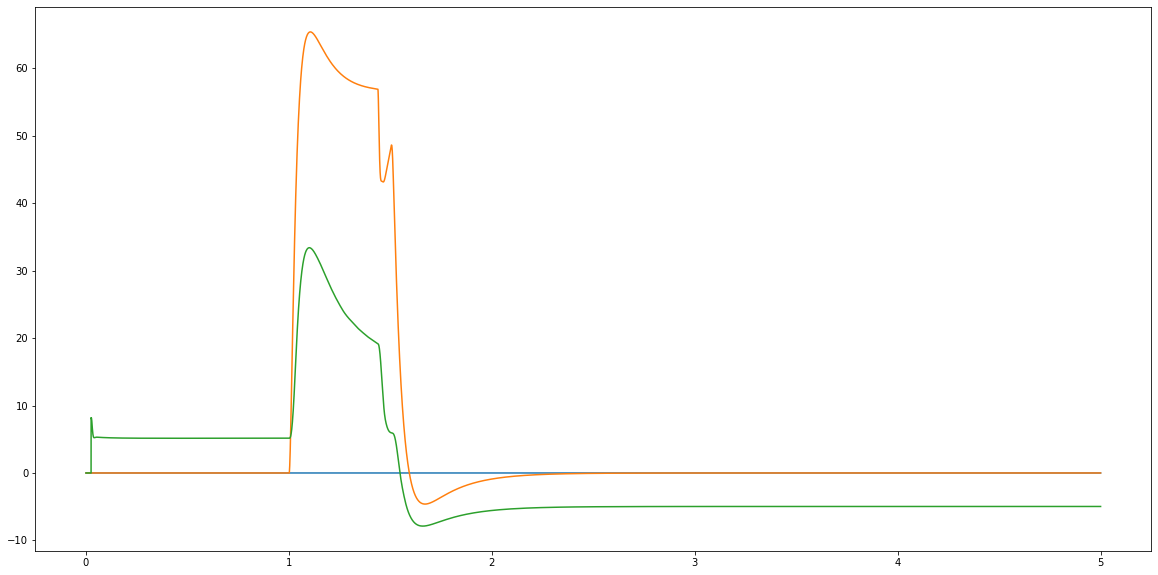

In [8]:
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(time, ref_torque)
plt.plot(time, sim_torque)
plt.plot(time, model_torque)